<a href="https://colab.research.google.com/github/PetrGavrilin/VKR_URFU/blob/main/VKR_part2_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Подготовка данных</h1>

In [1]:
try:
  import tsfel
except:
  !pip install tsfel >/dev/null 2>&1
  import tsfel

In [35]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq

In [3]:
import sys
sys.path.append('/content')

from vkr_function import my_features_extraction, add_my_supplot

In [48]:
Y = pd.read_csv('/content/flow_rate.csv')
sig_up = pd.read_csv('/content/sig_up.csv')
sig_dw = pd.read_csv('/content/sig_dw.csv')
borders = pd.read_csv('/content/borders.csv').values.tolist()[0]

In [5]:
nX_up = my_features_extraction(sig_up)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [6]:
nX_dw = my_features_extraction(sig_dw)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [7]:
print(len(nX_up[0]))
print(len(nX_dw[0]))

306
312


In [49]:
X = np.hstack([nX_up, nX_dw])
Y = np.array(Y['Et'])

In [9]:
#X.tofile('X_tsfel.csv',sep=',')

X_tsfel = pd.DataFrame(np.array(X))
X_tsfel.to_csv('/content/X_tsfel.csv', index=False)

Обработка данных с помощью функции Савицкого-Голея

In [12]:
sig_up_sg = sig_up.apply(lambda x: savgol_filter(x,30,4), axis=0) # сглаженные сигналы 1-го пьезоэлектрического датчика
sig_dw_sg = sig_dw.apply(lambda x: savgol_filter(x,30,4), axis=0) # сглаженные сигналы 2-го пьезоэлектрического датчика

In [72]:
s = borders
def add_my_supplot (sig, Y, r, i, max_sig, n):

  ax = fig.add_subplot(len(s)+1, 4, i)
  plt.title(f"Сигнал {n}-го датчика для расхода {Y[r]:.2f}")
  plt.xlabel("t, c.")
  if n == 1:
    plt.ylabel("А, мВ")
  plt.plot([i*0.0256/512 for i in range(512)], sig.iloc[r], linewidth= 0.3)
  plt.grid()

  i+=1
  ax = fig.add_subplot(len(s)+1, 4, i)
  yf = rfft(np.array(sig.iloc[r])/ max_sig)
  xf = rfftfreq(512, 0.0256/512)
  plt.plot(xf[1:], np.abs(yf[1:]))
  plt.xlabel("f, Гц")
  plt.title("Спектр сигналов")
  plt.grid()


In [76]:
max_sig = int(max(max(sig_up_sg),max(sig_dw_sg)))

In [83]:
max(sig_up_sg.max().max(),sig_dw_sg.max().max())

707.5472866110183

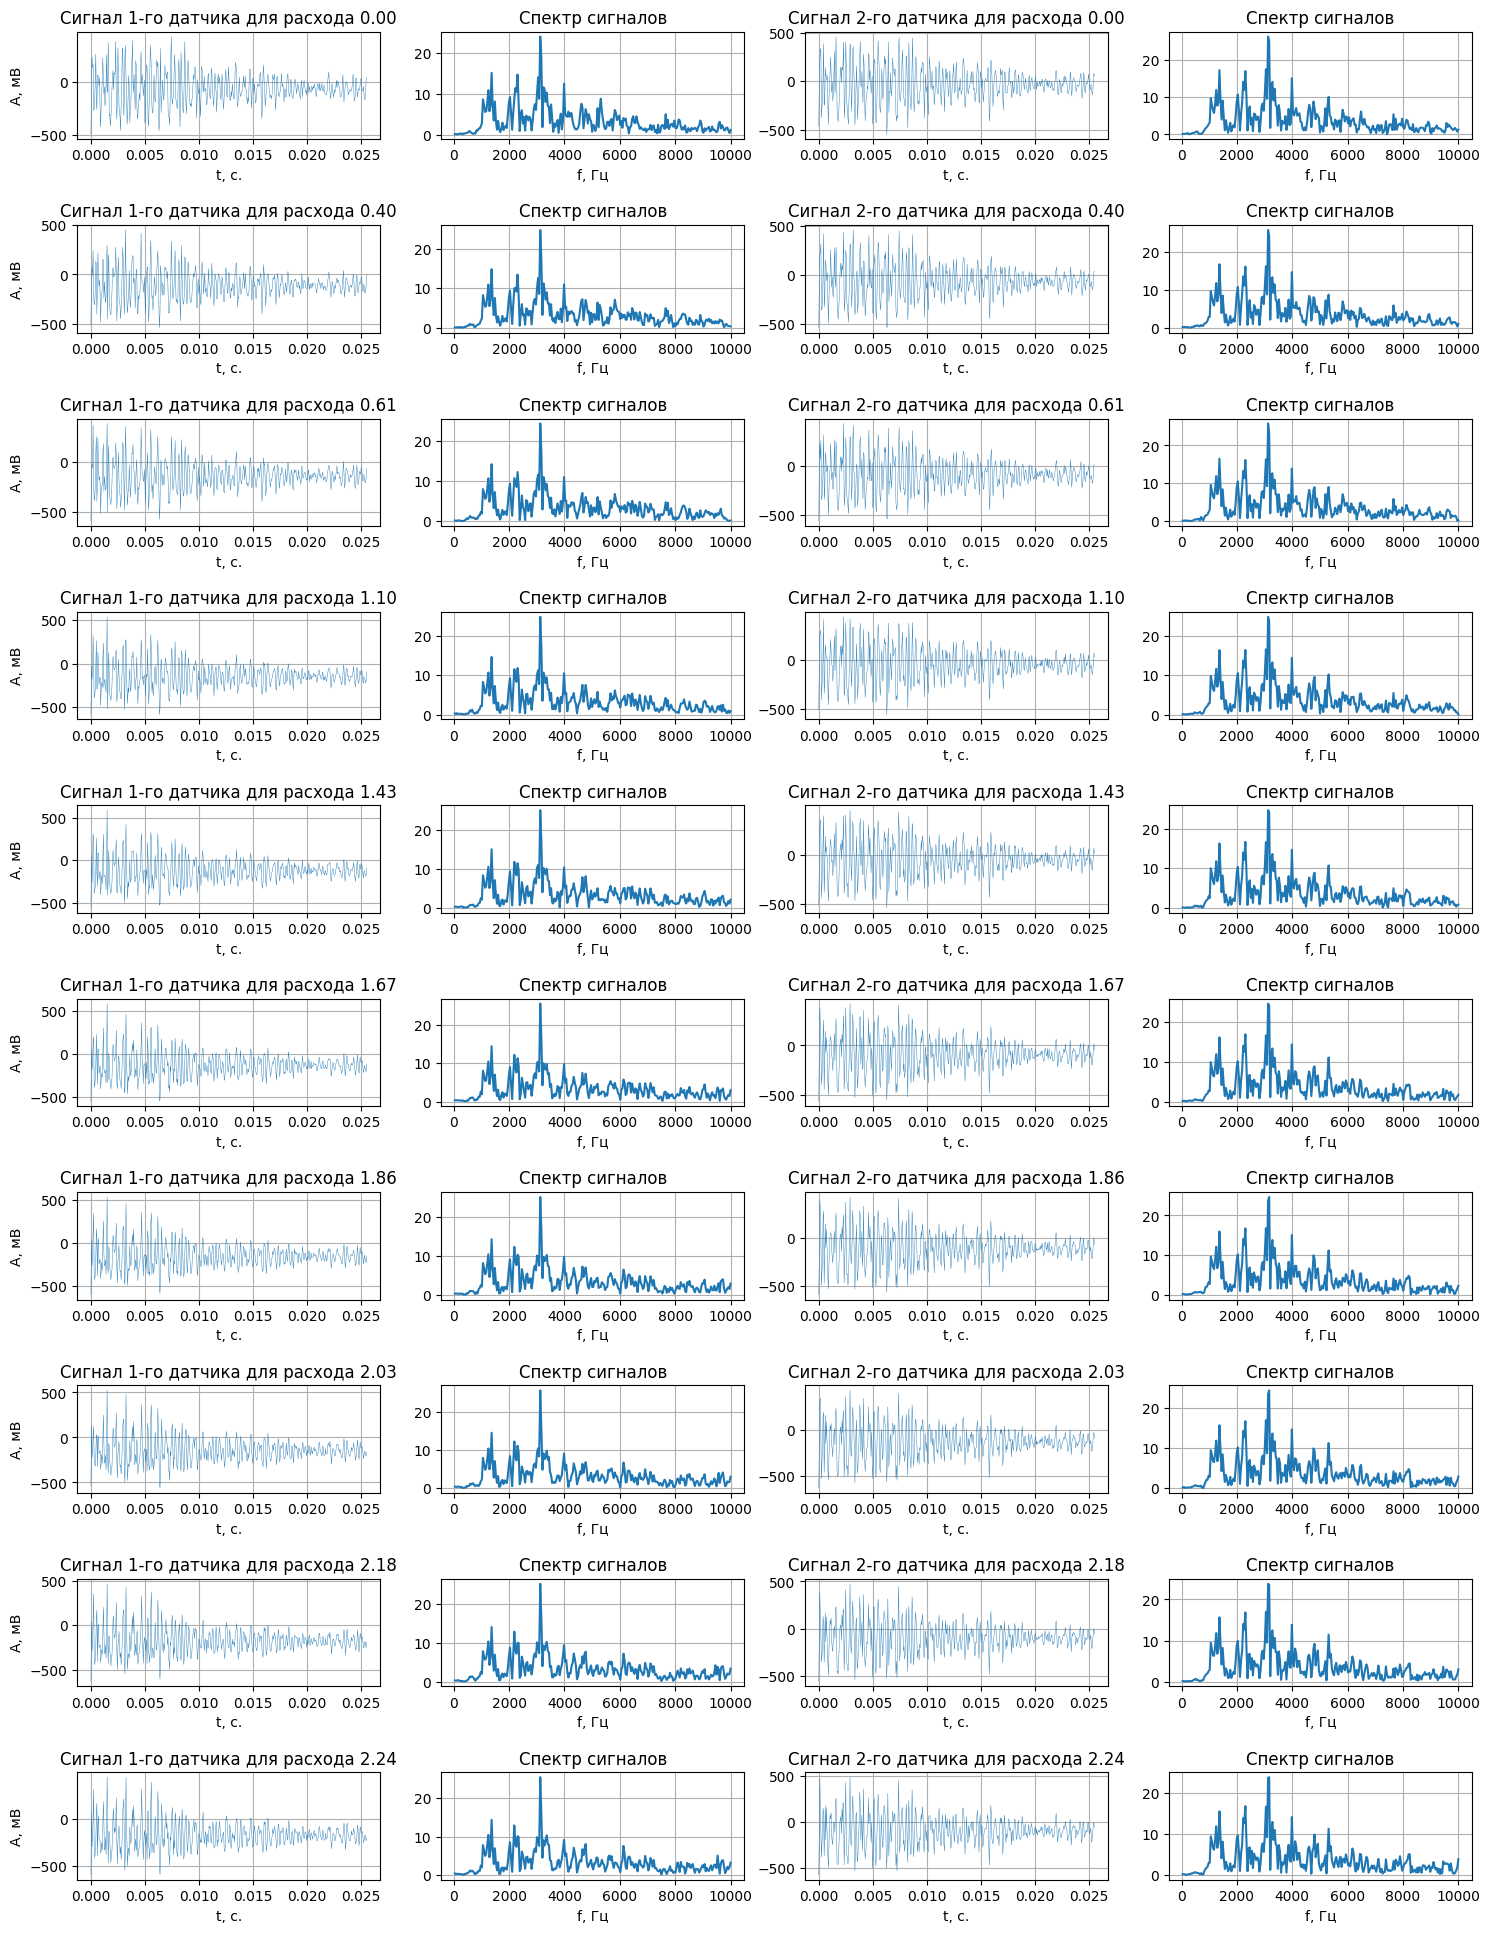

In [84]:
fig = plt.figure(figsize = (18, 24))
fig.subplots_adjust(hspace = 0.8, wspace = 0.2)
i = 1
max_sig = max(sig_up_sg.max().max(),sig_dw_sg.max().max())

add_my_supplot (sig_up_sg, Y, 50, i, max_sig, 1)
i+=2
add_my_supplot (sig_dw_sg, Y, 50, i, max_sig, 2)
i+=2

for R in s:
  add_my_supplot (sig_up_sg, Y, R+50, i, max_sig, 1)
  i+=2
  add_my_supplot (sig_dw_sg, Y, R+50, i, max_sig, 2)
  i+=2

In [85]:
nX_up = my_features_extraction(sig_up_sg)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [86]:
nX_dw = my_features_extraction(sig_dw_sg)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [87]:
print(len(nX_up[0]))
print(len(nX_dw[0]))

236
271


Осталось гораздо меньше признаков, чем без применения сглаживания

In [90]:
X = np.hstack([nX_up, nX_dw])

In [91]:
#X.tofile('X_tsfel_savgol.csv',sep=',')

X_tsfel_savgol = pd.DataFrame(X)
X_tsfel_savgol.to_csv('/content/X_tsfel_savgol.csv', index=False)

Данные, предварительно обработанные по скользящему среднему

In [92]:
sig_up_rol = sig_up.rolling(60, min_periods=1, axis=0).sum() # скользящее среднее сигналов 1-го пьезоэлектрического датчика
sig_dw_rol = sig_dw.rolling(60, min_periods=1, axis=0).sum() # скользящее среднее сигналов 2-го пьезоэлектрического датчика
sig_up_rol

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-485.815430,97.485352,485.815430,-103.930664,-7.250977,-154.687500,-274.731445,-144.213867,167.578125,310.986328,...,19.335938,-63.647461,1.611328,-43.505859,-40.283203,-138.574219,-64.453125,-70.092773,71.704102,73.315430
1,-857.226563,219.140625,721.069336,-250.561523,-52.368164,-248.950195,-332.739258,-261.840820,29.809570,219.140625,...,-38.671875,-112.792969,-82.983398,-90.234375,-136.157227,-271.508789,-225.585938,-176.440430,74.926758,124.072266
2,-1463.085938,-74.121094,647.753906,355.297852,506.762695,-849.169922,-775.854492,-597.802734,6.445312,800.830078,...,-166.772461,-232.836914,-203.833008,-188.525391,-309.375000,-468.896484,-430.224609,-295.678711,12.890625,131.323242
3,-2015.771484,-374.633789,533.349609,864.477539,1187.548828,-1529.956055,-1278.588867,-963.574219,-50.756836,1373.657227,...,-288.427734,-374.633789,-376.245117,-285.205078,-489.843750,-655.810547,-665.478516,-435.864258,-40.283203,150.659180
4,-2586.987305,-724.291992,605.053711,1435.693359,1614.550781,-2086.669922,-1715.258789,-1313.232422,-20.947266,1931.982422,...,-328.710938,-528.515625,-480.981445,-381.079102,-593.774414,-865.283203,-865.283203,-571.215820,-25.781250,140.991211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,-38550.622559,1382.922363,-20266.882324,-10402.331543,2826.672363,27046.545410,-19480.554199,-28068.127441,-24265.393066,-17970.739746,...,-9488.708496,-8202.868652,-10771.325684,-15572.277832,-15424.841309,-12150.622559,-11199.938965,-12716.198730,-14858.459473,-12646.105957
3911,-38503.894043,1453.015137,-20318.444824,-10235.559082,2892.736816,26999.816895,-19481.359863,-28072.155762,-24199.328613,-17966.711426,...,-9412.170410,-8167.419434,-10751.989746,-15510.241699,-15330.578613,-12119.201660,-11178.186035,-12667.053223,-14787.561035,-12615.490723
3912,-38418.493652,1412.731934,-20274.133301,-10175.939941,2910.461426,26984.509277,-19529.699707,-28007.702637,-24209.802246,-17904.675293,...,-9423.449707,-8214.953613,-10750.378418,-15485.266113,-15304.797363,-12154.650879,-11143.542480,-12621.130371,-14775.476074,-12638.854980
3913,-38598.962402,1243.542480,-20378.063965,-10020.446777,3366.467285,27400.231934,-19634.436035,-28323.522949,-24300.036621,-17951.403809,...,-9394.445801,-8196.423340,-10770.520020,-15457.873535,-15278.210449,-12078.112793,-11138.708496,-12602.600098,-14755.334473,-12555.871582


In [93]:
nX_up = my_features_extraction(sig_up_rol)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [94]:
nX_dw = my_features_extraction(sig_dw_rol)

*** Feature extraction started ***


/content/vkr_function.py:79: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg_file, s)



*** Feature extraction finished ***


In [95]:
print(len(nX_up[0]))
print(len(nX_dw[0]))

146
178


In [96]:
X = np.hstack([nX_up, nX_dw])

In [97]:
X_tsfel_rol = pd.DataFrame(X)
X_tsfel_rol.to_csv('/content/X_tsfel_rol.csv', index=False)

In [98]:
sig_up

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-485.815430,97.485352,485.815430,-103.930664,-7.250977,-154.687500,-274.731445,-144.213867,167.578125,310.986328,...,19.335938,-63.647461,1.611328,-43.505859,-40.283203,-138.574219,-64.453125,-70.092773,71.704102,73.315430
1,-371.411133,121.655273,235.253906,-146.630859,-45.117188,-94.262695,-58.007812,-117.626953,-137.768555,-91.845703,...,-58.007812,-49.145508,-84.594727,-46.728516,-95.874023,-132.934570,-161.132812,-106.347656,3.222656,50.756836
2,-605.859375,-293.261719,-73.315430,605.859375,559.130859,-600.219727,-443.115234,-335.961914,-23.364258,581.689453,...,-128.100586,-120.043945,-120.849609,-98.291016,-173.217773,-197.387695,-204.638672,-119.238281,-62.036133,7.250977
3,-552.685547,-300.512695,-114.404297,509.179688,680.786133,-680.786133,-502.734375,-365.771484,-57.202148,572.827148,...,-121.655273,-141.796875,-172.412109,-96.679688,-180.468750,-186.914062,-235.253906,-140.185547,-53.173828,19.335938
4,-571.215820,-349.658203,71.704102,571.215820,427.001953,-556.713867,-436.669922,-349.658203,29.809570,558.325195,...,-40.283203,-153.881836,-104.736328,-95.874023,-103.930664,-209.472656,-199.804688,-135.351562,14.501953,-9.667969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,-560.339355,331.530762,26.989746,-84.997559,-124.475098,-77.746582,-192.956543,-311.389160,-204.235840,-27.795410,...,-43.103027,-22.155762,-95.471191,-110.778809,-137.365723,-51.159668,-89.831543,-55.187988,-129.309082,-54.382324
3911,-726.708984,-94.262695,-578.466797,-145.825195,146.630859,726.708984,-447.949219,-643.725586,-480.175781,-435.058594,...,-186.108398,-211.889648,-236.059570,-303.735352,-288.427734,-279.565430,-263.452148,-272.314453,-307.763672,-274.731445
3912,-679.174805,-130.517578,-497.094727,-274.731445,64.453125,749.267578,-422.973633,-605.859375,-551.074219,-397.192383,...,-245.727539,-224.780273,-268.286133,-327.905273,-322.265625,-310.180664,-243.310547,-281.982422,-317.431641,-318.237305
3913,-548.657227,71.704102,-198.193359,67.675781,368.188477,315.014648,-146.630859,-397.192383,-255.395508,-178.857422,...,-33.032227,-0.805664,-90.234375,-107.153320,-132.934570,-36.254883,-78.149414,-66.870117,-125.683594,-45.922852


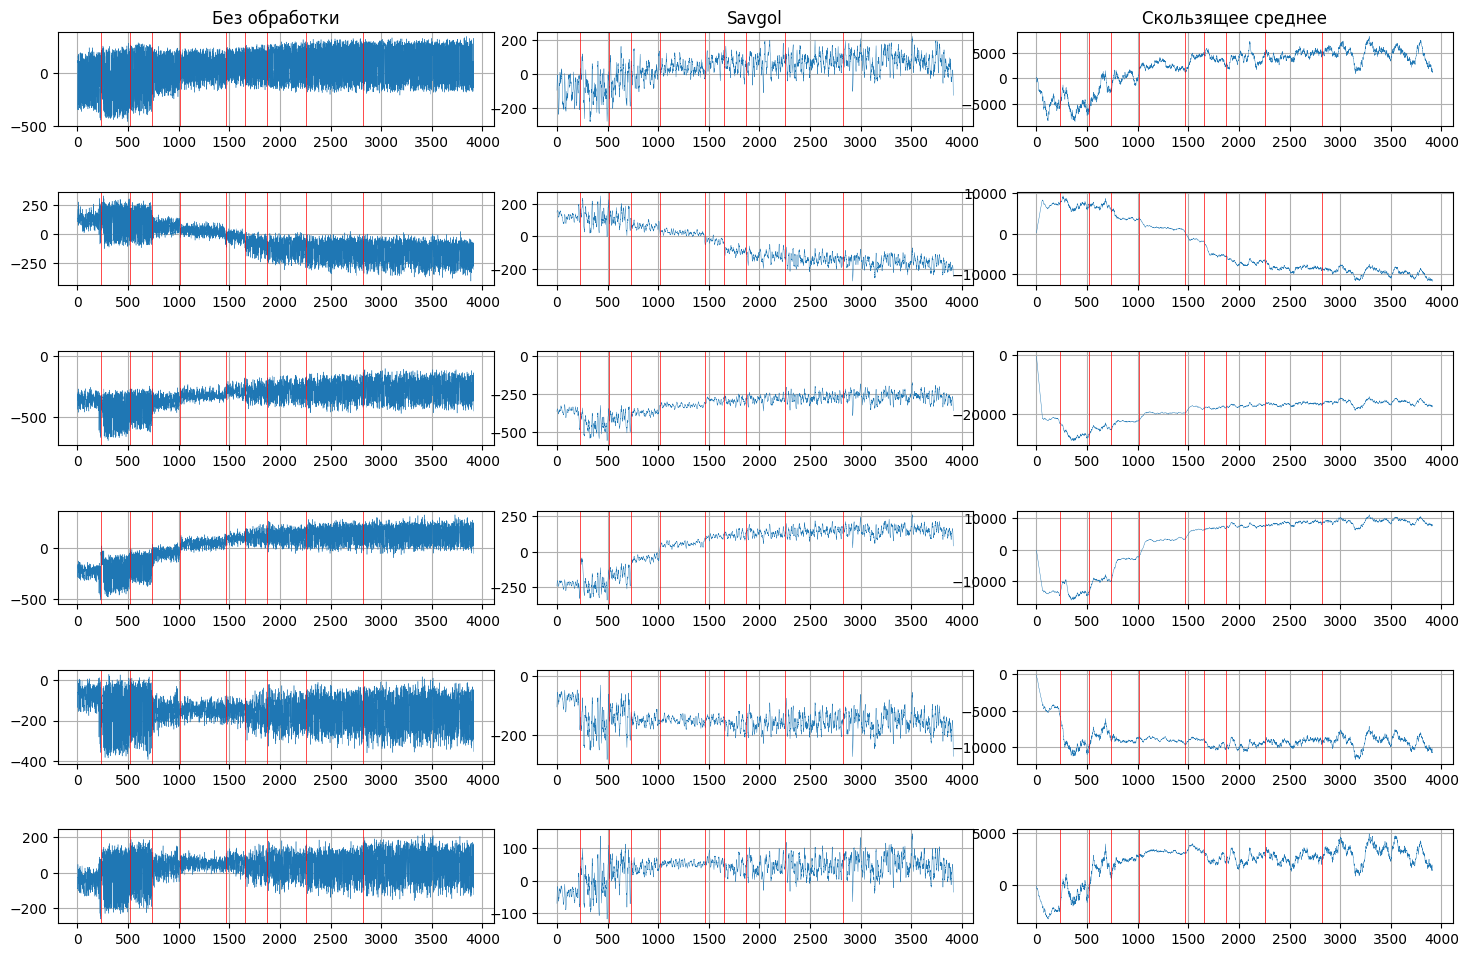

In [99]:

fig = plt.figure(figsize = (18, 24))
fig.subplots_adjust(hspace = 0.7, wspace = 0.1)

limit_ = 3500
j = 0

for i in range(1, 300, 50):
  j+=1
  ax = fig.add_subplot(12, 3, j)
  if i==1:
    plt.title("Без обработки")
  #plt.xlabel("Номер измерения")
  plt.plot(sig_up.iloc[:,i], linewidth= 0.3)
  for x in borders:
    if x < limit_:
        plt.axline((x, X_tsfel[i].max()), (x, X_tsfel[i].min()), color="red", linewidth= 0.5)
  plt.grid()
  j+=1
  ax = fig.add_subplot(12, 3, j)
  if i==1:
    plt.title("Savgol")
  #plt.xlabel("Номер измерения")
  plt.plot(sig_up_sg.iloc[:,i], linewidth= 0.3)
  for x in borders:
    if x < limit_:
        plt.axline((x, X_tsfel[i].max()), (x, X_tsfel[i].min()), color="red", linewidth= 0.5)
  plt.grid()
  j+=1
  ax = fig.add_subplot(12, 3, j)
  if i==1:
    plt.title("Скользящее среднее")
  #plt.xlabel("Номер измерения")
  plt.plot(sig_up_rol.iloc[:,i], linewidth= 0.3)
  for x in borders:
    if x < limit_:
        plt.axline((x, X_tsfel[i].max()), (x, X_tsfel[i].min()), color="red", linewidth= 0.5)
  plt.grid()
plt.show()